<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/1045_%EA%B1%B0%EC%A7%93%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제이름

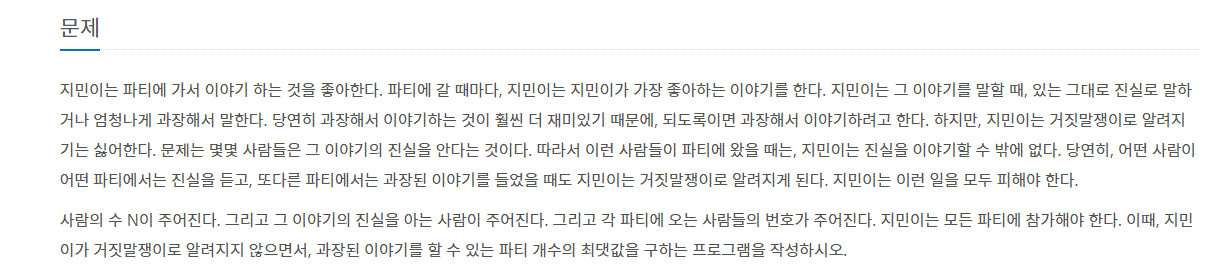

## 입력 출력 및 예제


* 입력

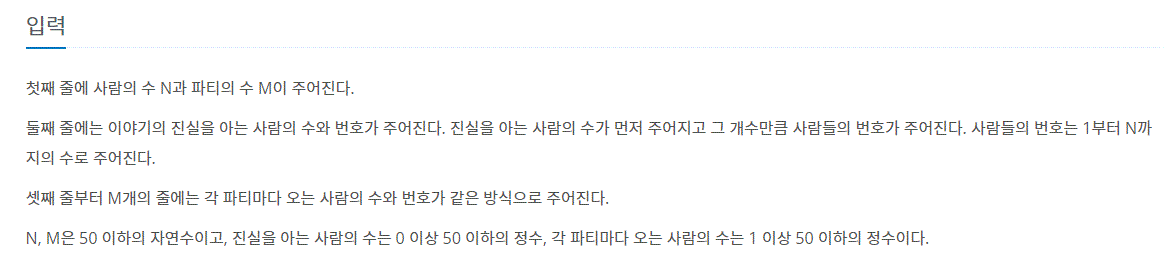

* 출력

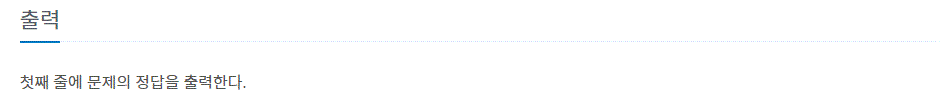

* 예제

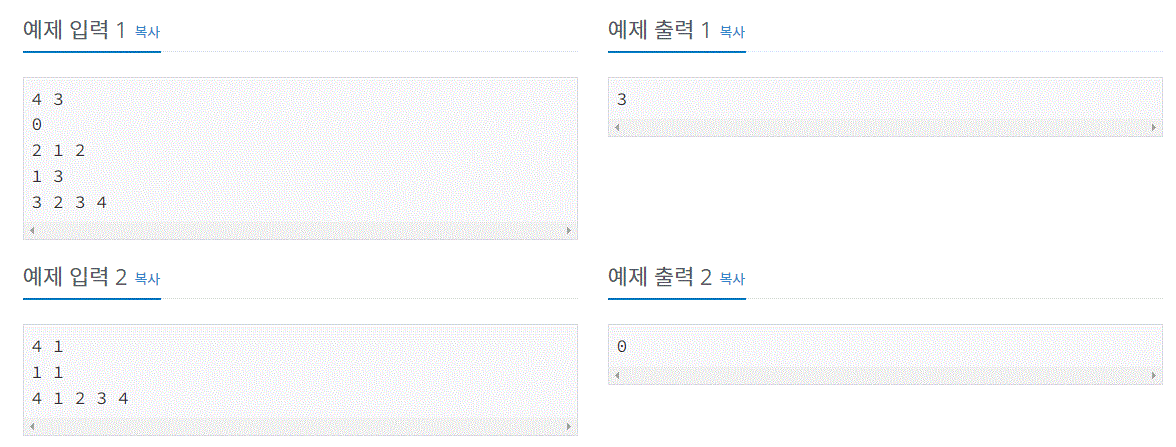

## 구상

- 진실을 아는 사람이 파티에 있으면 그 파티에서 진실을 모르는 사람도 진실된 이야기를 들어야하므로 진실을 알게된다. 그리하여 만일 그 사람은 진실을 아는 사람으로 취급할 수 있고 그 사람이 속한 파티 또한 모두 진실을 아는 사람이 된다

- 진실을 아는 사람과 접점이 있다면 모두 전염. 시킬 수 있다고 보고
모든 사람들의 접점 여부를 확인한 다음 각 파티에서 진실을 아는 사람이 한명도 없는 파티의 수를 구한다

- 주어진 정보와 DFS를 이용하여 사람들이 연결된 그래프를 만들고, 그 중 진실을 아는 사람이 있다면 연결된 모두가 진실을 알도록 만든다

## 코드

In [ ]:
N,M = map(int,input().split())    # 사람 수, 파티 수
truth_num = list(map(int,input().split()))    # 진실 사람 수, 그 사람들의 번호
party_info = []    # 각 파티의 사람 수, 사람들의 번호

people = [False]*(N+1)    # 사람들 진실 유무 판별을 위한 배열

people[0] = 0
for i in truth_num[1::]:
    people[i]=True    # 진실 아는 사람 저장

for i in range(M):
    party_info.append(list(map(int,input().split())))    # 각 파티의 정보 입력

for i in range(M):    # 모든 파티를 돌면서
    for j in party_info[i][1::]:    # 해당 파티의 사람들(인덱스)중
        if people[j]==True:    # 진실 아는 사람이 있다면 X 정보공유를 하는 사람들 O
            for k in party_info[i][1::]:
                people[k]=True    #해당 파티의 사람들 모두 True 처리

cnt = 0
for i in range(M):
    for j in party_info[i][1::]:
        if people[j]==True:
            cnt += 1
            break

print(M-cnt)

In [ ]:
test = [[0]*5]
test

[[0, 0, 0, 0, 0]]

In [ ]:
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ') # 줄 바꿈 없이 공백 처리
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]: # i 는 v 번 노드와 연결되어 있는 노드, 즉 graph[v] 는 v 노드와 연결된 노드 리스트를 뜻함
        if not visited[i]: # i 노드가 방문된 적 없으면
            dfs(graph, i, visited) # i 에 대해 dfs 재귀 처리

In [ ]:
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
         [], # 0번 비워둠
         [2,3,8], # 1번 노드와 연결된 노드 번호
         [1,7],   # 2번 ...
         [1,4,5], # 3번 ...
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
print(dfs(graph,1,visited))
visited = [False] * 9
print(dfs(graph,2,visited))

In [ ]:
know.pop()

2

In [ ]:
# https://velog.io/@jslog/%EB%B0%B1%EC%A4%80-1043%EB%B2%88-%EA%B1%B0%EC%A7%93%EB%A7%90-Python

import sys
input = sys.stdin.readline

N, M = map(int, input().split())

# 거짓말을 하면 안 될 사람들을 담는 스택
# 진실을 아는 사람의 수는 필요가 없어 슬라이싱 함
know = list(map(int, input().split()))[1:]

# 스택에 추가된 적이 있는지 확인하기 위한 리스트
visit = [0] * N
for k in know:
    visit[k-1] = 1

parties = []
for _ in range(M):
    guests = list(map(int, input().split()))[1:]    # 파티 손님의 수는 필요가 없어 슬라이싱 함
    parties.append(guests)

party_visit = [0] * M   # 진실을 말해야 하는 파티일 경우 1이라고 표기

# 스택이 빌때까지 과정 반복
while know:
    known_guest = know.pop()

    candidate = set()   # pop된 사람들과 같은 파티에 있는 사람들을 담는 집합
    
    # pop된 사람과 같은 파티에 있는 사람들을 찾아 집합에 추가한다.
    for party_idx in range(len(parties)):
        party = set(parties[party_idx])
        if known_guest in party:    # pop된 사람이 현재 파티에 있을 경우
            candidate = candidate.union(party)  # 파티의 사람들을 집합에 추가
            party_visit[party_idx] = 1  # 현재 파티를 진실을 말해야 하는 파티라고 표기

    # 찾은 사람들 중 스택에 추가된 적이 없는 사람들을 스택에 추가
    for guest in candidate:
        if not visit[guest - 1]:
            know.append(guest) 
            visit[guest - 1] = 1

# 표기되지 않은 파티의 개수를 출력
print(party_visit.count(0))



## 메모
